## 1. Bevezetés

### 1.1 Telepítés

A csomag sikeres telepítéséhez legalább **3.6.x** verziójú Python szükséges!


#### 1.1.1 Anaconda környezet, telepítés, frissítés

Anaconda esetén a telepítés az Anaconda Prompt megnyitásával zajlik. Ahhoz, hogy az Anaconda ne kérdezzen rá minden alkalommal, hogy biztosan telepíteni szeretnénk-e, célszerű futtatni a
```shell
conda config --set always_yes true
```
sort. Ezután minden beírt parancs végre fog hajtódni rákérdezés nélkül.

A telepítéshez a következő sort kell beírni:
```shell
conda install -c ptrskay pysprint -c conda forge
```

Amennyiben a telepítés sikeresen végbement, akkor meg fog jeleníteni valami olyasmit, hogy *Succesfully installed packages pysprint*. 

Anaconda Promptban a következő paranccsal le is ellenőrizhető, hogy telepítve van-e a csomag.

```shell
conda list pysprint
```

Ez valami hasonlót ad vissza, ha telepítve van:
```shell
 packages in environment at C:\Users\lp\miniconda3:

 Name                    Version                   Build  Channel
pysprint                  0.12.3                   py37_0    ptrskay
```
Ha valamilyen okból nem sikerült, akkor az előbbi parancs egy üres sort fog visszaadni.

A csomag frissítése ugyancsak az Anaconda Prompttal történik (fontos lehet, mivel a jövőben még frissíteni fogom a programot). 

A frissíteni a köv. paranccsal lehetséges:
```shell
conda update pysprint
```

A frissítésen és telepítésen kívül az Anaconda Prompt nem szükséges.

#### 1.1.2 Hagyományos Python környezet, PIP

Hagyományos Python környezetet használva a telepítés a Parancssorban történik:
```shell
python -m pip install pysprint
```
A frissítéshez tartozó parancs pedig:
```shell
python -m pip install --upgrade pysprint
```


### 1.2 Importálás
Szigorúan véve nem szükséges a `numpy` és `matplotlib` importálás ahhoz, hogy a csomag működjön, de a biztonság kedvéért ajánlott előtte azokat is meghívni. Ez után a csomag importálása szokásos módon az
```python
import pysprint as ps
```
sorral történik. A `ps` rövidítést én vezettem be, ezt tartottam logikusnak.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pysprint as ps

A verzió számát a python csomagoknál megszokott 
```python
ps.__version__
```
rövidítéssel érhetjük el. A későbbiekben fontos lesz, mivel néhány kisebb hiba javításra kerül majd <s>, illetve a WFT kiértékelés is hozzáadásra kerül</s> (kieg.: 0.12.1 verzióban már benne van) a későbbiekben. 

In [2]:
print('verzió: ', ps.__version__)
print('szerző: ', ps.__author__)

verzió:  0.12.3
szerző:  Leéh Péter


### 1.3 Hibák jelentése

A programhoz tartozik a `print_info` függvény, amivel minden fontos információt kiír a környezetről, ami a problémák megoldásánál hasznos lehet.

In [3]:
ps.print_info()


PYSPRINT ANALYSIS TOOL

        SYSTEM
----------------------
python     : 3.7.6.final.0
python-bits: 64
OS         : Windows
OS-release : 10
Version    : 10.0.18362
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
byteorder  : little

      DEPENDENCY
----------------------
pysprint   : 0.12.3
numpy      : 1.18.4
scipy      : 1.4.1
matplotlib : 3.2.2
pandas     : 1.0.1
pytest     : 5.4.2
lmfit      : 1.0.1
numba      : 0.50.1
IPython    : 7.12.0

      ADDITIONAL
----------------------
Conda-env  : False
IPython    : True
Spyder     : False


### 1.4 Mértékegységek

Először fontos kikötni a mértékegységeket: hullámhossztartományban *nm*, frekvenciatartományban *PHz* egységekben dolgozik a program. **Minden kiértékelés előtt frekvenciatartományba kell váltani az adott interferogrammot.** Az eredmények ezután *fs* (és hatványai) egységekben lesznek kiszámítva.

## 2. Szimulációk

Bár alapvetően ez egy kevésbé használt funkció, a példák során ezt is fogom használni, így illik ezt is bemutatni.
A funkció a következőképpen néz ki (az alapértelmezett értékeivel):

```
ps.Generator(
    start,   < -- a spektrum kezdőértéke, hullámhossztartomány esetén nm, frekvenciatartomány esetén PHz
    stop,    < -- a spektrum végértéke, hullámhossztartomány esetén nm, frekvenciatartomány esetén PHz
    center,  < -- a központi hullámhossz/frekvencia
    delay=0, < -- a karok közti időbeli késleltetés fs egységekben
    GD=0,     
    GDD=0,
    TOD=0,   < -- a diszperziós együtthatók
    FOD=0,
    QOD=0,
    resolution=0.1, < -- az interferogram felbontása nm egységekben (függetlenül milyen tartományban dolgozunk)
    delimiter=",",  < -- a mentésnél az alapértelmezett elválasztó
    pulse_width=10, < -- az impulzus félértékszélességét szabályzó paraméter fs egységben (lent tau_p)
    normalize=False, < -- normálja-e az interferogramot (ha igen, akkor a karok spektrumát is visszaadja)
    chirp=0, < -- lineáris csörp paraméter (lent a)
)
```

A spektrális intenzitás alakja:


$\LARGE{I(\omega) = C\cdot e^{\frac{(\omega-\omega_0)^2\cdot \tau_p^2}{4 ln2\sqrt{1 + a^2}}}}$

A használatához először inicializálni kell a `Generator` objektumot, aztán annak függvényében, hogy milyen tartományban szeretnénk generálni az interferogramot két lehetőség van:
* `ps.Generator.generate_freq()` - a frekvenciatartománybeli generálás
* `ps.Generator.generate_wave()` - a hullámhossztartománybeli generálás

A következőkben két interferogramot generálok, az egyiket frekvenciatartományban (1 és 4 *PHz* között 2.355 *PHz* központi frekvenciával fog egy harmadrendű diszperziót tartalmazó interferogramot generálni 100 *fs* karok közti késleltetésnél), illetve a másikat hullámhossztartományban (hasonló paraméterekkel, csak 400 és 1000 *nm* között 800 *nm* központi hullámhosszal).

In [4]:
f = ps.Generator(1, 4, 2.355, 100, TOD=500, pulse_width=5) # <-- itt még nem számolja ki a spektrumot
f.generate_freq() # < -- ezzel a sorral már kiszámolja a spektrumot

g = ps.Generator(400, 1000, 800, 100, TOD=500, normalize=True) # <-- hasonlóan itt még nem számolja ki a spektrumot
g.generate_wave() # < -- ezzel a sorral már kiszámolja a spektrumot

Ezzel létrehoztuk a `g` és `f` generátor objektumokat és generáltuk is a hozzájuk tartozó spektrumokat. Néhány funkciója a `Generator` objektumoknak:
* `ps.Generator.show()` <-- mutassa a generált interferogramot
* `ps.Generator.phase_graph()` <-- mutassa a generált interferogramot együtt a spektrális fázisfüggvénnyel
* `ps.Generator.save(name)` <-- elmenti a spektrumot *name* névvel egy txt fájlba
* `ps.Generator.data` <-- adja vissza a generált adatokat np.ndarray-ként

Példaként néhányat ezek közül meghívok:

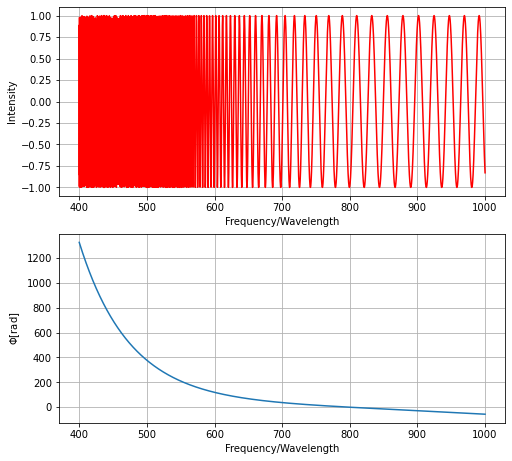

In [5]:
g.phase_graph()

In [6]:
g.save("ifg")

Successfully saved as ifg.txt.


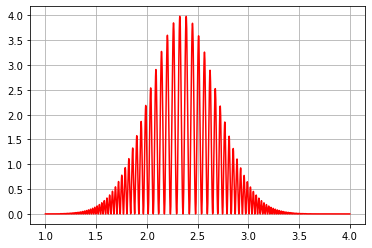

In [7]:
f.show()

A generált adatok eléréséhez a `ps.Generator.data` függvényt használhatjuk. Ha normáljuk az interferogramot, akkor ez vissza fogja adni a karok spektrumait is. Minden visszaadott érték `np.ndarray` típusú.

In [8]:
gx, gy, gref, gsam = g.data # a g normált volt, ezért a referencia- és tárgynyaláb spektrumát is visszaadja

In [9]:
fx, fy = f.data # az f pedig nem

In [10]:
print(type(fy))

<class 'numpy.ndarray'>


## 3. Koszinusz-függvény illesztéses módszer, CosFitMethod


Néhány művelet minden kiértékelési módszernél hasznos lehet, (ilyenek pl. a   hullámhossztartományból frekvenciatartományba váltás vagy fordítva, normálás, fontos részek kivágása, stb.) ezért ezt minden objektum eléri. Erről egy külön munkafüzetet készítettem, ahol részletesen leírok mindent. 
Ez a következő szekcióban érhető el.

A támogatott kiértékelési eljárások:

* `ps.MinMaxMethod` - Minimum-maximum módszer
* `ps.CosFitMethod` - Fázismodulált koszinusz-függvény illesztéses módszer
* `ps.FFTMethod` - Fourier-transzformációs módszer
* `ps.WFTMethod` - Ablakolt Fourier-transzformációs módszer (új a 0.12.1 verzióban)
* `ps.SPPMethod` - Állandó fázisú pont módszere

Az alábbi bevezető példában a `CosFitMethod`-ot fogom használni. Kétféleképpen tölthetjük be az interferogramot: fájlból töltjük be az adatokat, vagy `np.ndarray`-ban már Pythonban be van töltve nekünk (pl. a szimulációt használtuk) a szükséges spektrum.

In [11]:
# 1. mód: np.ndarrayból töltjük be
a = ps.CosFitMethod(gx, gy, gref, gsam) # < -- ezek a fenti szimulációból származnak

# vagy röviden:
# a = ps.CosFitMethod(*g.data)

# 2. mód: fájlból töltjük be (ehhez csatoltam a fájlokat)
b = ps.CosFitMethod.parse_raw(
    'datasets/ifg.trt',
    'datasets/ref.trt',
    'datasets/sam.trt',
    skiprows=8,
    meta_len=6,
    delimiter=";",
    decimal=","
)

Az `parse_raw` függvény alapbeállításait a `help(ps.Dataset.parse_raw)` függvénnyel könnyen átnézhetjük. Például egy tizedespontokat használó, vesszővel elválasztott adatokat tartalmazó fájlt a következőképpen kellene helyesen betölteni:
```python
mm2 = ps.MinMaxMethod.parse_raw('ifg.txt', 'ref.txt', 'sam.txt', decimal='.', sep=',', skiprows=0, meta_len=0) 
```

In [12]:
help(ps.CosFitMethod.parse_raw)

Help on method parse_raw in module pysprint.core.bases.dataset:

parse_raw(filename, ref=None, sam=None, skiprows=0, decimal='.', sep=None, delimiter=None, comment=None, usecols=None, names=None, swapaxes=False, na_values=None, skip_blank_lines=True, keep_default_na=False, meta_len=1, errors='raise', callback=None, parent=None) method of pysprint.core.bases._dataset_base._DatasetBase instance
    Dataset object alternative constructor.
    Helps to load in data just by giving the filenames in
    the target directory.
    
    Parameters
    ----------
    filename: `str`
        base interferogram
        file generated by the spectrometer
    ref: `str`, optional
        reference arm's spectra
        file generated by the spectrometer
    sam: `str`, optional
        sample arm's spectra
        file generated by the spectrometer
    skiprows: `int`, optional
        Skip rows at the top of the file. Default is `0`.
    decimal: `str`, optional
        Character recognized as decim

Minden ilyen objektum különleges print funkcióval rendelkezik. Itt néhány alapvető információt jelenít meg magáról, illetve ha fájlból töltöttük be, akkor kiolvas adatokat egy saját dictionary-be.

In [13]:
print(b)

CosFitMethod
----------
Parameters
----------
Datapoints: 2633
Predicted domain: wavelength
Range: from 360.500 to 1200.250 nm
Normalized: True
Delay value: Not given
SPP position(s): Not given
----------------------------
Metadata extracted from file
----------------------------
{
    "Average": "1 scans",
    "Data measured with spectrometer name": "1107006U1",
    "Integration time": "2,00 ms",
    "Nr of pixels used for smoothing": "0",
    "Wave": "Sample",
    "comment": "m_ifg 8,740",
    "reference_comment": "m_ref 8,740",
    "sample_comment": "m_sam 8,740",
    "unparsed": [
        [
            "Timestamp [10 microsec ticks]256373440"
        ]
    ]
}


A saját dictionary a `meta` kulcsszóval érhető el.

In [14]:
b.meta

{'comment': 'm_ifg 8,740',
 'Integration time': '2,00 ms',
 'Average': '1 scans',
 'Nr of pixels used for smoothing': '0',
 'Data measured with spectrometer name': '1107006U1',
 'unparsed': [['Timestamp [10 microsec ticks]256373440']],
 'Wave': 'Sample',
 'reference_comment': 'm_ref 8,740',
 'sample_comment': 'm_sam 8,740'}

Akár saját információt is hozzáadhatunk a dictionary adattípusnál megszokott módon:

In [15]:
b.meta['fontos_adat_amit_be_szeretnek_allitani'] = 20

In [16]:
b.meta

{'comment': 'm_ifg 8,740',
 'Integration time': '2,00 ms',
 'Average': '1 scans',
 'Nr of pixels used for smoothing': '0',
 'Data measured with spectrometer name': '1107006U1',
 'unparsed': [['Timestamp [10 microsec ticks]256373440']],
 'Wave': 'Sample',
 'reference_comment': 'm_ref 8,740',
 'sample_comment': 'm_sam 8,740',
 'fontos_adat_amit_be_szeretnek_allitani': 20}

A metaadatok közül talán a comment a legfontosabb, mivel ez az, amit a mérés során mi írunk be. Ezt kiírtani a köv. módon lehet:

In [17]:
print(b.meta['comment'])

m_ifg 8,740


Láthattuk a printelés során, hogy *Predicted domain: wavelength*. Frekvenciatartományba váltani a `chdomain()` függvénnyel lehet. Ekkor újra kiprintelve már a domain frequency-re vált. Megjegyzés: ez csak akkor működik jól, ha `PHz` és `nm` egységekben dolgozunk, különben rossz lehet a predikció.

In [18]:
b.chdomain()

A `plot()` metódussal meg tudjuk nézni az adatsort. Jupyterben nem szükséges a `plt.show()` meghívása, de máshol az lehet. Itt látható, hogy a számunkra fontos rész kb. 2.0 és 3.75 *PHz* között van, a többit nem kívánjuk használni. A kivágás a `slice()` metódussal lehetséges.

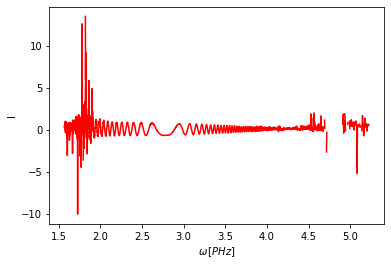

In [19]:
b.plot()

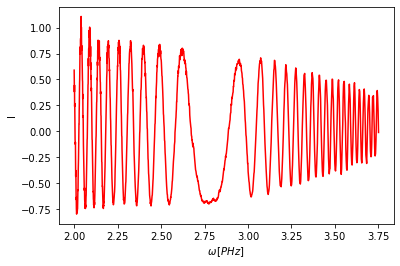

In [20]:
b.slice(2, 3.75)
b.plot()

Egy ilyen objektumbeli adatokat elérni - a Generatorhoz hasonlóan - a `data` metódussal lehet. Ez egy `pandas.DataFrame` objektumot ad vissza, ami itt Jupyterben szép táblázat formájában jelenítődik meg.

In [21]:
b.data

,x,y
0,3.750800,-0.009973
1,3.748337,0.198811
2,3.745877,0.322196
3,3.743420,0.393736
4,3.740892,0.299712
...,...,...
1358,2.002649,0.240820
1359,2.001989,0.446164
1360,2.001330,0.380374
1361,2.000671,0.550828


Ha pl. szeretnénk csak az `y` értékeket kinyerni `np.ndarray` formában, akkor azt megtehetjük így:

In [22]:
y_ertekei = b.data.y.values
print(type(y_ertekei))

<class 'numpy.ndarray'>


In [23]:
print(y_ertekei)

[-0.009973    0.19881073  0.32219592 ...  0.3803739   0.55082753
  0.58969469]


A fázismodulált koszinusz-függvény illesztéses módszernél megjelenik néhány specifikus elem. Az első ilyen a `GD_lookup(reference_point, engine='cwt', silent=False, **kwargs)`. Ez a függvény a `reference_point` környezetében egymást követő minimumok/maximumok távolságát vizsgálja, majd a $2\pi$-t osztja ezeknek a távolságoknak az átlagával. Ez jól becsüli a GD-t, amennyiben a szélsőértékeket relatíve pontosan találja meg a függvény. Ennek testreszabására való az `engine` argumentum, illetve a további `**kwargs` keyword argumentumok. Ebben a példában az alapbeállítás megfelelő, így nem módosítok rajta.

In [24]:
b.GD_lookup(reference_point=2.355)

The predicted GD is ± 90.17543 fs based on reference point of 2.355.


Ezt lefuttatva a program már be is állította az illesztésnél a GD kezdőértékét. Természetesen előfordulhat, hogy manuálisan szeretnénk értéket megadni, ezt a 
```python
b.guess_GD(szám)
```
sorral lehetséges.
A további együtthatók kezdőértékeit találgatni a GD-vel azonos séma alapján tudjuk: 
```python
b.guess_GDD(másik szám)
b.guess_TOD(harmadik szám)
stb.
```

Koszinusz-függvény illesztésénél két módon végezhetjük el a kiértékelést, a hagyományos illesztési eljárással, vagy a szakdolgozatomban leírt szukcesszív illesztést használva. Először a hagyományost mutatom be. Ekkor relatíve jó kezdeti tippeket kell adnunk a paramétereknek, hogy megfelelően jól közelítse az illesztés az eredeti adatpontokat. Ezt ennél a példánál - ismerve a valódi értékeket - megadom a kezdőértékeket, ezután a `set_max_order(order)` függvénnyel megadom, hogy maximum hányadrendű diszperziót keressen. Ezután futtatom a `calculate(reference_point)` metódust, ami a kiértékelést végzi.

In [25]:
b.guess_GD(83) # az előbbi GD = 90.17 nem elég jó tipp, azzal pontatlan az illesztés
b.guess_GDD(-170)
b.guess_TOD(-115)
b.set_max_order(3)
b.calculate(reference_point=2.355);

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Sajnos itt (egyelőre ilyen, később hozzáadásra kerülhet) az $R^2$ értékét nem írja ki a program, így manuálisan a `plot_result()` függvényt kell meghívni rajta. Ez visszaad egy Matplotlib plotot is, amin az eredeti adatsor és az illesztett görbe van.

r^2 = 0.9570133345623358


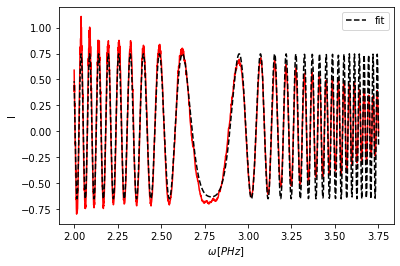

In [26]:
b.plot_result()

Az általam írt optimalizáló szukcesszív módszert az 

```python
optimizer(reference_point,
           order=3,
           initial_region_ratio=0.1,
           extend_by=0.1,
           coef_threshold=0.3,
           max_tries=5000,
           show_endpoint=True
           )
```
függvény meghívásával érhetjük el. A helyes működéshez az `initial_region_ratio` argumentum, vagyis a kezdőrégió aránya és az `extend_by` argumentum, vagyis a tartománynövekedés megfelelő beállítása szükséges. Néhány gyakori hiba és azok megoldása a `help(ps.CosFitMethod.optimizer)` kiíratásával angol nyelven olvasható, de sajnos ez sem teljes még.  Mivel az előbbi hagyományos kiértékelésnél a kezdőértékeket jól megtippeltem, mielőtt futtatnám a saját optimalizáló algoritmust elrontom a kezdőértékeket, csak a GD-t hagyom meg. Ebben a példában az alapbeállítás elégséges, így nem változtatok meg semmilyen argumentumot, csak a referencia pontot és a diszperzió rendjét adom meg.

Working... -

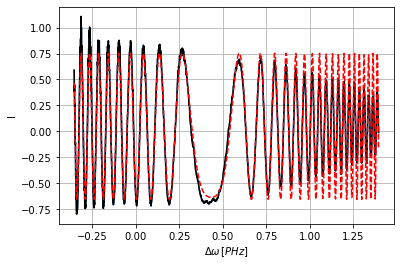

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [27]:
b.guess_GDD(1)
b.guess_TOD(1)
b.optimizer(reference_point=2.355, order=3);

Kontrasztként bemutatom azt is, hogy mi történik, amikor valamilyen beállítás nem megfelelő. Az `extend_by` értékét jóval el fogom állítani, vagyis túlságosan gyorsan fog az illesztés régiója nőni, így az eljárás nem fog megfelelő illesztést találni.

Working... \

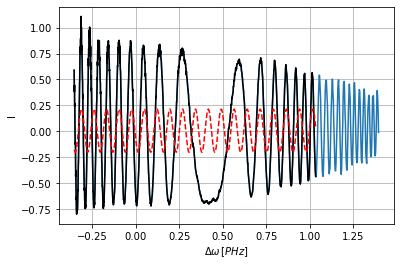

Max tries (currently set to 5000) reached without finding a suitable fit.


In [28]:
b.guess_GDD(1)
b.guess_TOD(1)
b.optimizer(reference_point=2.355, order=3, extend_by=0.5);

Ekkor kékkel az eredeti adatsor, pirossal az illesztett görbe, feketével pedig az aktuális illesztési terület látszódik.
